In [2]:
import pandas as pd
import matplotlib as mat
import seaborn as sb
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import statistics as st
import warnings
warnings.filterwarnings('ignore')


In [9]:
df=pd.read_csv("DS1_C5_S3_BazilHousing_Data_Hackathon (1).csv")

In [4]:
df.isnull().sum()        ## no null values so no treatment required.

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [5]:
Min=min(df['total (R$)'])  
Max=max(df['total (R$)']) 
Range=Max-Min
Q1=df['total (R$)'].quantile(0.25)        
Q3=df['total (R$)'].quantile(0.75)       
IQR=Q3-Q1                                
UF=Q3+1.5*IQR                         
LF=Q1+1.5*IQR  

In [6]:
# removing the outliers from the data
UF

13827.375

In [11]:
df=df[(df['total (R$)']<13827.375)] # i wont remove the value less than  lower fence as i want to find house as cheaper as possible.


In [12]:
## Comparing the mean median and Std Devivation of prices of houses in sao paula and rio and with the rest of other citiis
d1=df.groupby(['city'])[['total (R$)']].agg(['mean', 'std', 'median'])
d1

total (R$)                     
                       mean          std  median
city                                            
Belo Horizonte  3808.147679  2940.263971  2813.0
Campinas        2999.982185  2425.546191  2113.0
Porto Alegre    2795.798812  2075.562836  2192.0
Rio de Janeiro  4032.551318  2713.122388  3127.0
São Paulo       5093.249110  3236.939736  4136.0

<Figure size 800x500 with 0 Axes>

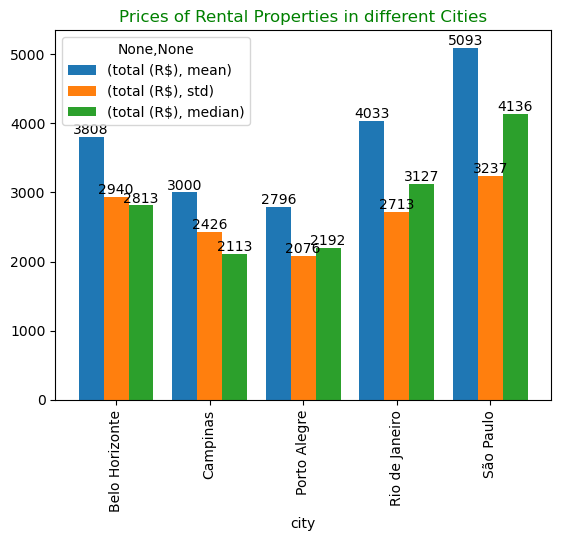

In [9]:
plt.figure(figsize=(8,5))
d1.plot.bar(width=0.8,align='center')
plt.title('Prices of Rental Properties in different Cities',color='g')
for bar in plt.gca().patches:            
    con_values=bar.get_height()
    x=bar.get_x() + bar.get_width() /2     
    y=bar.get_height() 
    plt.annotate(round(con_values),(x,y),va='bottom',ha='center')
plt.show()

### The reason for these people to relocate is due to  expensive rental property prices.So while looking for the rental property that suited their needs it was made sure that-

###  the rental property should be below the mean prices in Rio and Sao Paulo with same exact requirements.As if they could have compromised then why would they even relocate.


### Finding a suitable house can be a challenging task, especially when the needs of the people involved are diverse. For instance, families with children may require a home with sufficient space and amenities to accommodate their needs, while single professionals may prioritize proximity to work and social activities. As a result, it is crucial to approach the search for a suitable house with a good understanding of the unique needs of the people involved. This can be achieved through data analysis that takes into account factors such as location, property features, and the preferences of the individuals involved, to suggest housing options that suits  their diverse needs.


In [10]:
rio_sao=df[(df.city=='São Paulo')|(df.city=='Rio de Janeiro')] 


# A Family looking for a house in cities other than Sao Paulo and Rio De Rio de Janeiro.

## For TYPE 1 Family:

### The houses that  could be suitable for a family consisting of adults and no elderly individuals, with optional pets. They  would require a furnished property with at least three bedrooms and two bathrooms.

## For TYPE 2 Family:

### A family consisting of adults with children or elderly individuals would benefit from a ground-floor living space.The family  would require a furnished property with at least three bedrooms and two bathrooms.

In [11]:
not_rio_sao=df[(df.city!='São Paulo')&(df.city!='Rio de Janeiro')] ## Other Three Cities        
                                                                                             

In [12]:
## Family house requirenmts in Rio and Sao Paulo

family_rio_sao=rio_sao[(rio_sao.rooms>=3)& (rio_sao.bathroom>=2)&(rio_sao.furniture=='furnished')]  

In [13]:
family_mean_price_in_rio=family_rio_sao['total (R$)'].mean()

In [14]:
family_mean_area_in_rio=family_rio_sao['area'].mean()



In [15]:
# family house requirements in Other cities.

family_not_in_rio=not_rio_sao[(not_rio_sao.rooms>=3)& (not_rio_sao.bathroom>=2)&(not_rio_sao.furniture=='furnished')&(not_rio_sao['total (R$)']<=family_mean_price_in_rio)
                     &(not_rio_sao['area']>=family_mean_area_in_rio)]

In [16]:

family_mean_price_in_not_rio=family_not_in_rio['total (R$)'].mean()

In [17]:
### now if the familes have older people and kids they will want to prefer ground floor.

family_ground_floor=family_not_in_rio[family_not_in_rio.floor==0]

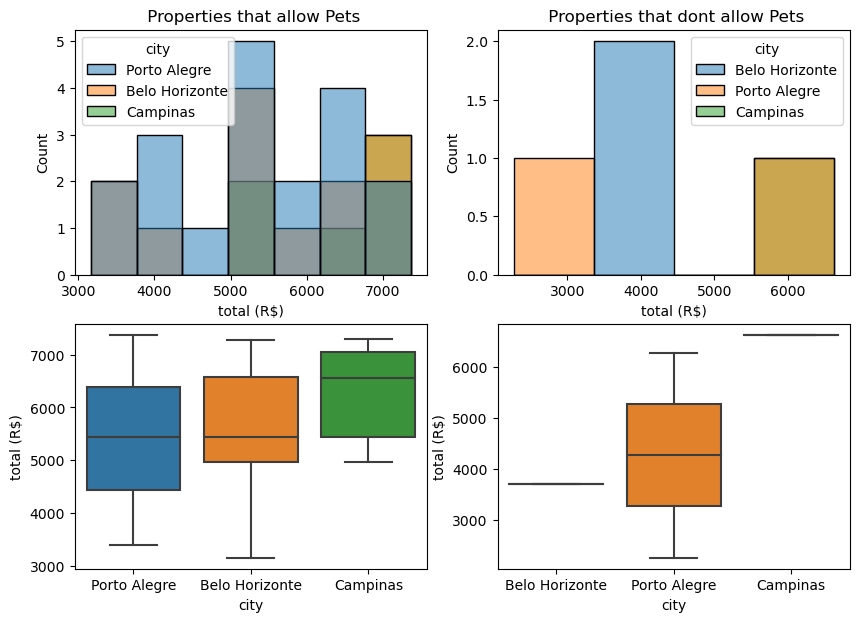

In [18]:
# if they  own a pet or not  # without kids or Older Age people

family2=family_not_in_rio[family_not_in_rio.animal=='acept']    # if they own a pet
family3=family_not_in_rio[family_not_in_rio.animal!='acept']    # if they dont own a pet

fig=plt.figure(figsize=(10,7)) 
plt.subplot(221)
sb.histplot(x=family2['total (R$)'],hue=family2['city'])
plt.title(' Properties that allow Pets')


plt.subplot(222)                                  
sb.histplot(x=family3['total (R$)'],hue=family3['city'])
plt.title(' Properties that dont allow Pets')

plt.subplot(223)                                  
sb.boxplot(y=family2['total (R$)'],x=family2['city'])


plt.subplot(224)                                  
sb.boxplot(y=family3['total (R$)'],x=family3['city'])


plt.show()

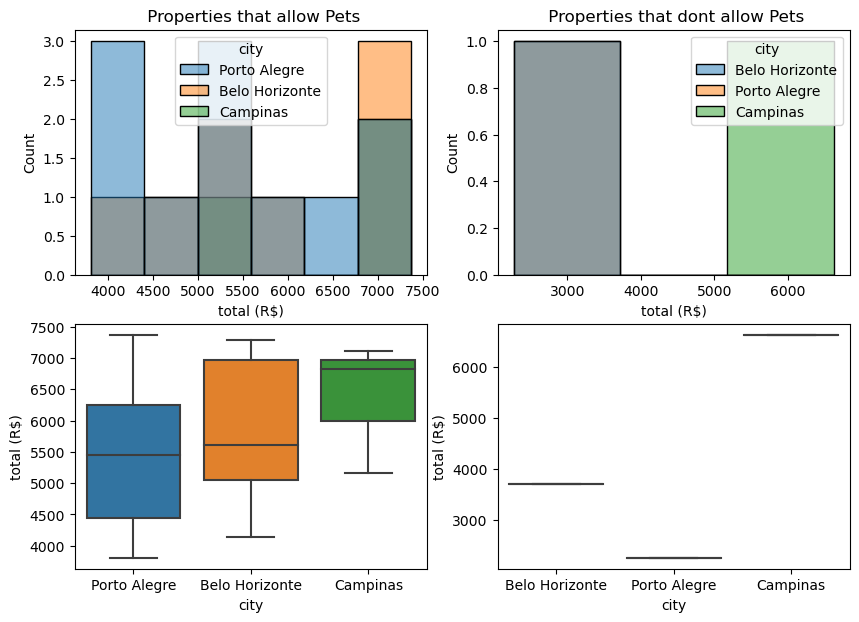

In [19]:
# if grandparents and kids
# if they  own a pet or not.

family4=family_ground_floor[family_ground_floor.animal=='acept']   # if they own a pet.
family5=family_ground_floor[family_ground_floor.animal!='acept']   # if they dont own a pet.

fig=plt.figure(figsize=(10,7)) 
plt.subplot(221)
sb.histplot(x=family4['total (R$)'],hue=family4['city'])
plt.title(' Properties that allow Pets')


plt.subplot(222)                                  
sb.histplot(x=family5['total (R$)'],hue=family5['city'])
plt.title(' Properties that dont allow Pets')

plt.subplot(223)                                  
sb.boxplot(y=family4['total (R$)'],x=family4['city'])


plt.subplot(224)                                  
sb.boxplot(y=family5['total (R$)'],x=family5['city'])

plt.show()


In [20]:
# non furnished home which allows pets

non_furnised=not_rio_sao[(not_rio_sao.rooms>=3)& (not_rio_sao.bathroom>=2)&(not_rio_sao.furniture!='furnished')&(not_rio_sao['total (R$)']<=family_mean_price_in_rio)
                     &(not_rio_sao['area']>=family_mean_area_in_rio)& (not_rio_sao.animal=='acept')]

Text(0.5, 1.0, 'Non Furnished Properties')

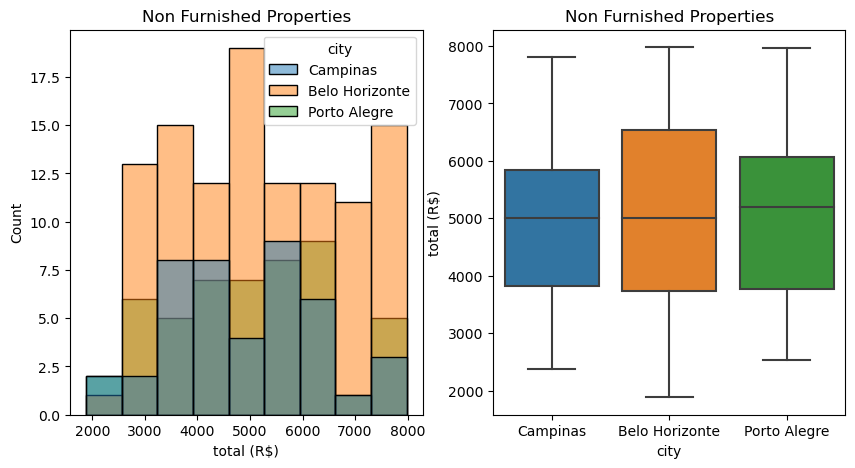

In [21]:
fig=plt.figure(figsize=(10,5)) 
plt.subplot(121)
sb.histplot(x=non_furnised['total (R$)'],hue=non_furnised['city'])
plt.title('Non Furnished Properties')

plt.subplot(122)
sb.boxplot(y=non_furnised['total (R$)'],x=non_furnised['city'])
plt.title('Non Furnished Properties')

In [22]:
# Central Tendencies of Total prices of houses  for family in cities other than Rio and Sao Paulo.

d2=family_not_in_rio.groupby(['city'])[['total (R$)']].agg(['mean', 'std', 'median'])
d2

total (R$)                     
                       mean          std  median
city                                            
Belo Horizonte  5284.333333  1387.459017  5082.0
Campinas        6323.857143   919.167636  6628.0
Porto Alegre    5296.095238  1336.905640  5444.0

In [23]:
# Central Tendencies of Total prices of houses  for family in cities other than Rio and Sao Paulo.

d3=family_rio_sao.groupby(['city'])[['total (R$)']].agg(['mean', 'std', 'median'])
d3

total (R$)                     
                       mean          std  median
city                                            
Rio de Janeiro  7466.018349  3014.865951  6883.0
São Paulo       8080.767483  3050.370709  8015.5

In [53]:
x1=d2.append(d3)
x1


total (R$)                     
                       mean          std  median
city                                            
Belo Horizonte  5284.333333  1387.459017  5082.0
Campinas        6323.857143   919.167636  6628.0
Porto Alegre    5296.095238  1336.905640  5444.0
Rio de Janeiro  7466.018349  3014.865951  6883.0
São Paulo       8080.767483  3050.370709  8015.5

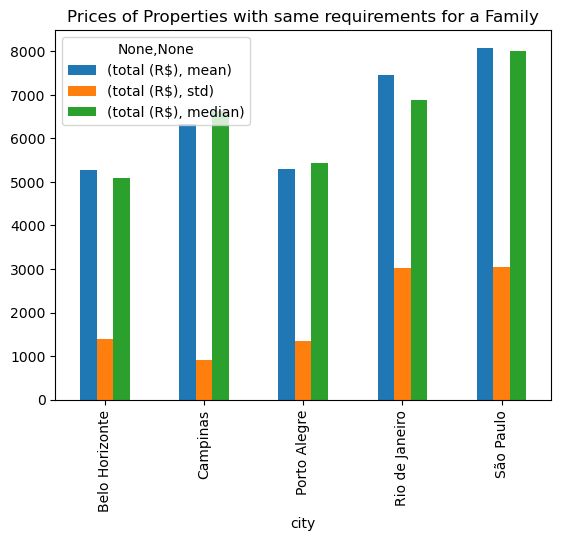

In [58]:

x1.plot.bar()
plt.title('Prices of Properties with same requirements for a Family')
plt.show()

In [25]:
## As we can see there a huge reduction of number of houses available if someone is looking to get a house on ground floor


# INTERPRETATION





### The Type 1 family
#### has more housing options compared to the Type 2 family. If the Type 1 family doesn't have any pets, then the best city for them would be Belo Horizonte, where rental prices range from 3400 to 5000. This price range is below the mean and median rental prices of houses in the city, making it an affordable option for the family.

### If the Type 1 family has a pet with them,
#### their housing options become limited. Only Belo Horizonte and Porto Alegre have houses that allow pets. However, there are only four houses available in Porto Alegre for this type of family, which can make it difficult to find a suitable rental property.


### For the Type 2 family without pets
#### the best city options are Campinas or Porto Alegre, as they have available houses in the range of 4000 to 4750, which is close to or slightly above the mean rental prices in these cities.

### For the Type 2 family with pets
#### the options become limited. Belo Horizonte and Porto Alegre are the only cities that have houses available for rent that allow pets. However, there are only two houses available in Belo Horizonte for this type of family, making it difficult to find a suitable rental property.

### SUGGESTION

#### It appears that the three cities mentioned earlier are not very pet-friendly for families looking for rental properties. If a family has a pet with them, they may need to compromise on other factors such as the number of rooms and bathrooms, or they can consider non-furnished homes, which can open up more options for them. It is important to keep in mind that finding a suitable rental property for families with pets can be challenging, but it is still possible to find a suitable option.


#### families having  pets with them then they can go for Non-Furnished Properties.
#### Best  city would be Belo Horizonte as this offers wide range of Rental Prices ranging from lowest to highest for a family with pets

#### It is important to do thorough research and consider all factors before making a final decision on a rental property.

## Rental Properties for a Bachelors.

## A Bachelor would need a 1 bedroom and Bathroom and Furnished and non-fursnied  both will work until it offers at certain value.1 parking space is optional 

In [26]:
## bachelors.
bachelor_in_rio=rio_sao[(rio_sao.rooms==1)& (rio_sao['parking spaces']<=1) & (rio_sao.bathroom==1)]

In [27]:
bachelor_mean_area_in_rio=bachelor_in_rio['area'].mean()
bachelor_mean_price_in_rio=bachelor_in_rio['total (R$)'].mean()



In [28]:
bachelor_not_in_rio_sao=not_rio_sao[(not_rio_sao.rooms==1)& (not_rio_sao['parking spaces']<=1) & (not_rio_sao.bathroom==1)&
                                    (not_rio_sao['total (R$)']<=bachelor_mean_price_in_rio)&(not_rio_sao['area']>=bachelor_mean_area_in_rio)]

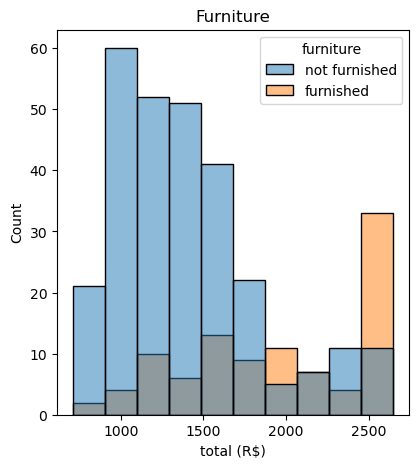

In [29]:
fig=plt.figure(figsize=(10,5)) 
plt.subplot(121)
sb.histplot(x=bachelor_not_in_rio_sao['total (R$)'],hue=bachelor_not_in_rio_sao['furniture'])
plt.title('Furniture')
plt.show()


In [30]:
## as houses which are non furnished and cheaper and have more choices.So bachelor should go for a non furnised house.

In [31]:
b1=bachelor_not_in_rio_sao[bachelor_not_in_rio_sao.furniture=='not furnished']      # if wants a non  furnished houses  

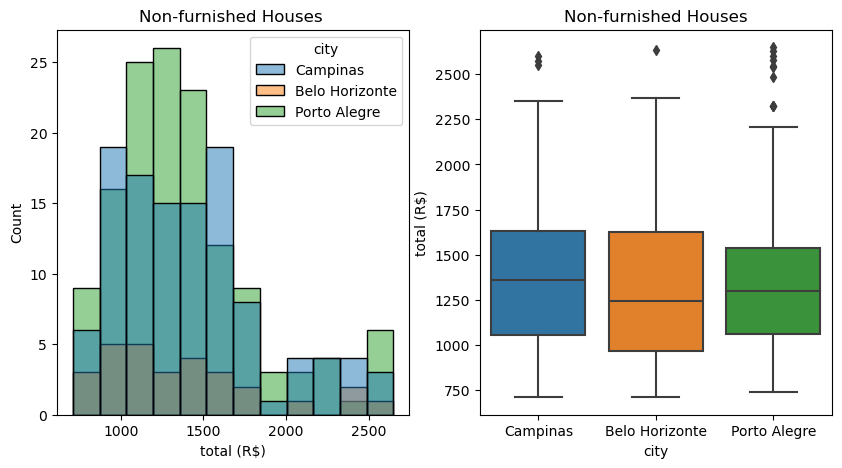

In [32]:
# if wants a furnished houses 
fig=plt.figure(figsize=(10,5)) 
plt.subplot(121)
sb.histplot(x=b1['total (R$)'],hue=b1['city'])
plt.title('Non-furnished Houses ')

plt.subplot(122)
sb.boxplot(y=b1['total (R$)'],x=b1['city'])
plt.title('Non-furnished Houses')
plt.show()                             



In [33]:
## in rio non fursnished
b2=rio_sao[(rio_sao.rooms==1)& (rio_sao['parking spaces']<=1) & (rio_sao.bathroom==1)&(rio_sao.furniture=='not furnished')]
bh1=b2.groupby(['city'])[['total (R$)']].agg(['mean', 'std', 'median'])
bh1

total (R$)                     
                       mean          std  median
city                                            
Rio de Janeiro  1933.884462   961.280466  1794.0
São Paulo       2100.291725  1185.005895  1764.0

In [34]:
## bachelor houses not  in Rio non furnished
bh2=b1.groupby(['city'])[['total (R$)']].agg(['mean', 'std', 'median'])
bh2

total (R$)                    
                       mean         std  median
city                                           
Belo Horizonte  1362.413793  506.048241  1246.0
Campinas        1424.660870  438.753035  1360.0
Porto Alegre    1383.051095  431.582371  1299.0

In [60]:
x2=bh1.append(bh2)
x2

total (R$)                     
                       mean          std  median
city                                            
Rio de Janeiro  1933.884462   961.280466  1794.0
São Paulo       2100.291725  1185.005895  1764.0
Belo Horizonte  1362.413793   506.048241  1246.0
Campinas        1424.660870   438.753035  1360.0
Porto Alegre    1383.051095   431.582371  1299.0

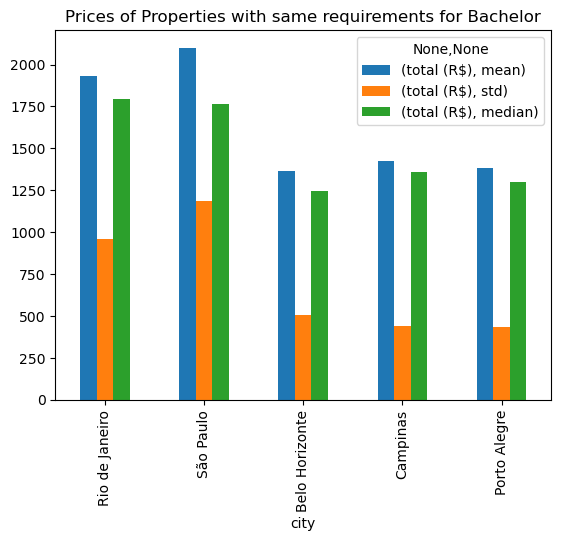

In [61]:
x2.plot.bar()
plt.title('Prices of Properties with same requirements for Bachelor')
plt.show()

## INTERPRETATION.
###  Non-furnished houses are generally less expensive and more easily available.
### For bachelors looking for rental properties that meet their needs, Porto Alegre and Belo Horizonte are the best cities to consider. These cities have a range of rental properties available and can provide options for those with specific requirements. It is important to do thorough research and consider all factors before making a final decision on a rental property.

# For Couples

### For couples looking for a house, a two-bedroom and one-bathroom property with a parking space is preferred. The property should be furnished and pets are optional. It is important suitable house should  meet the couple's needs and budget.

In [35]:

couples_in_rio=rio_sao[(rio_sao.rooms==2)& (rio_sao['parking spaces']==1) & (rio_sao.bathroom==1)&(rio_sao.furniture=='furnished')]


In [36]:
couple_mean_area_in_rio=couples_in_rio['area'].mean()
couples_mean_price_in_rio=couples_in_rio['total (R$)'].mean()

In [37]:
couples_not_in_rio_sao=not_rio_sao[(not_rio_sao.rooms==2)& (not_rio_sao['parking spaces']==1) & (not_rio_sao.bathroom==1)&
                                    (not_rio_sao['total (R$)']<=couples_mean_price_in_rio)&(not_rio_sao['area']>=couple_mean_area_in_rio)
                                  & (not_rio_sao.furniture=='furnished')]

In [38]:
## Couple houses not  in Rio and  non furnished
c1=couples_not_in_rio_sao.groupby(['city'])[['total (R$)']].agg(['mean', 'std', 'median'])
c1

total (R$)                    
                     mean         std  median
city                                         
Belo Horizonte    1905.25  519.117440  1873.5
Campinas          1998.50  774.281925  1998.5
Porto Alegre      2356.25  601.454131  2413.0

In [39]:
## Couple houses in Rio and  non furnished
c2=couples_in_rio.groupby(['city'])[['total (R$)']].agg(['mean', 'std', 'median'])
c2

total (R$)                     
                       mean          std  median
city                                            
Rio de Janeiro  3119.727273  2210.084639  2171.0
São Paulo       3636.173333  1781.103275  3031.0

In [63]:
x3=c1.append(c2)
x3

total (R$)                     
                       mean          std  median
city                                            
Belo Horizonte  1905.250000   519.117440  1873.5
Campinas        1998.500000   774.281925  1998.5
Porto Alegre    2356.250000   601.454131  2413.0
Rio de Janeiro  3119.727273  2210.084639  2171.0
São Paulo       3636.173333  1781.103275  3031.0

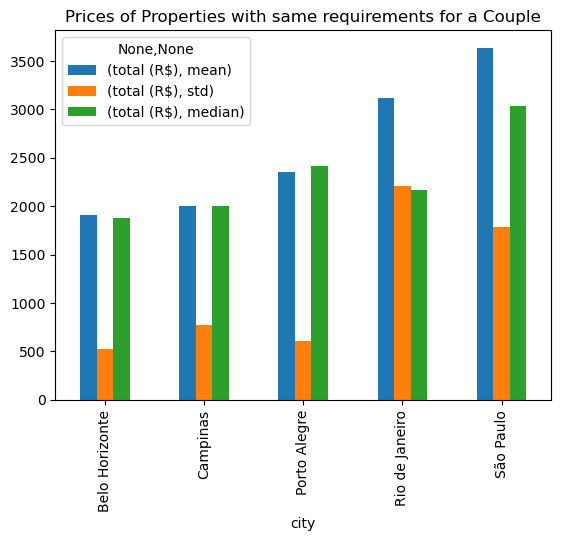

In [65]:
x3.plot.bar()
plt.title('Prices of Properties with same requirements for a Couple')
plt.show()

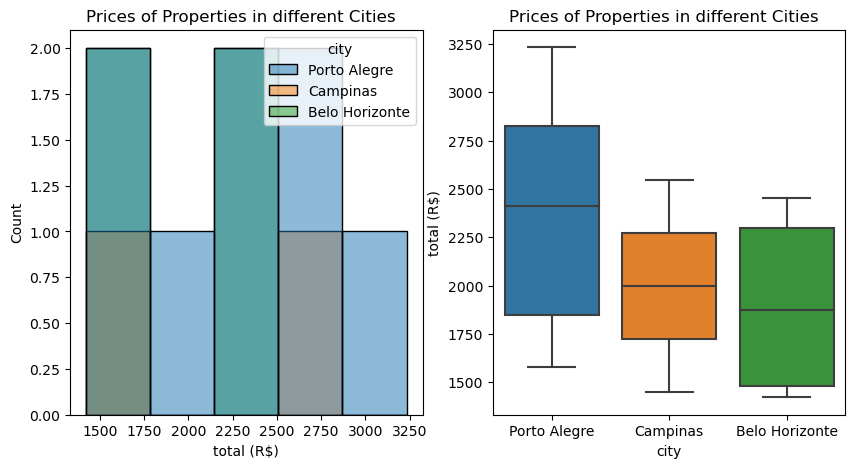

In [40]:

fig=plt.figure(figsize=(10,5)) 
plt.subplot(121)
sb.histplot(x=couples_not_in_rio_sao['total (R$)'],hue=couples_not_in_rio_sao['city'])
plt.title('Prices of Properties in different Cities  ')

plt.subplot(122)
sb.boxplot(y=couples_not_in_rio_sao['total (R$)'],x=couples_not_in_rio_sao['city'])
plt.title('Prices of Properties in different Cities  ')
plt.show()                             



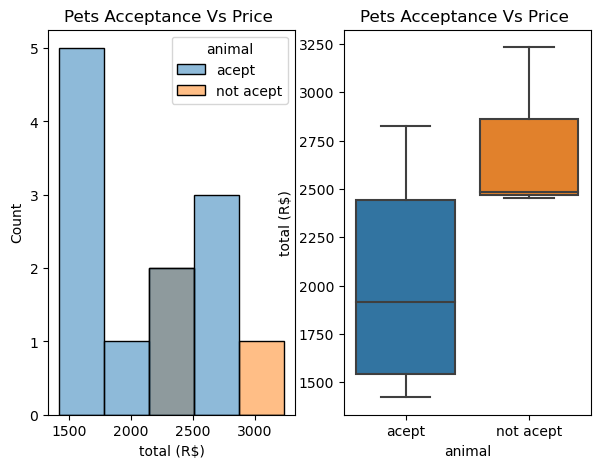

In [41]:
 
fig=plt.figure(figsize=(7,5)) 
plt.subplot(121)
sb.histplot(x=couples_not_in_rio_sao['total (R$)'],hue=couples_not_in_rio_sao['animal'])
plt.title('Pets Acceptance Vs Price ')

plt.subplot(122)
plt.title('Pets Acceptance Vs Price ')
sb.boxplot(y=couples_not_in_rio_sao['total (R$)'],x=couples_not_in_rio_sao['animal'])

plt.show()                             



In [42]:
cc=couples_not_in_rio_sao[couples_not_in_rio_sao.animal=='acept']    ## accepting pets
                           



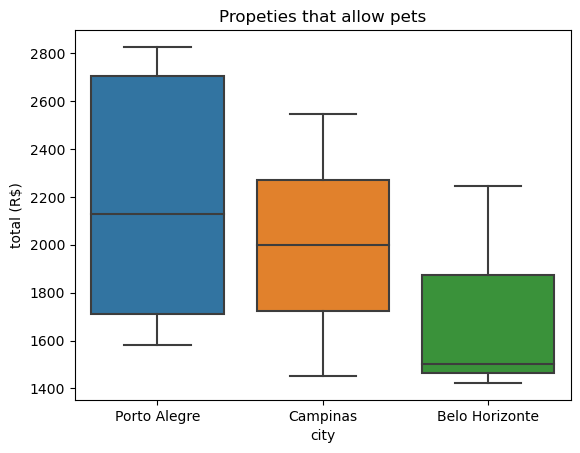

In [43]:

sb.boxplot(y=cc['total (R$)'],x=cc['city'])
plt.title('Propeties that allow pets')
plt.show() 

   # INTERPRETATION

### Couples looking for rental properties need not worry if they own a pet, as properties that allow pets are surprisingly  cheaper. If they are willing to pay above the mean prices in the city, then they should consider relocating to Porto Alegre, which has a range of rental properties that allow pets. However, if their budget is tight, then they should consider relocating to Belo Horizonte, which also has rental properties that allow pets and may be more affordable.  It is important to do thorough research and consider all factors before making a final decision on a rental property.